### 결정트리
     https://graphviz.org/download/#windows
    - 프로그램 설치 :pip install graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(
    iris.data,iris.target,stratify=iris.target,test_size=0.2,random_state=11
)


In [3]:
# DecisionTreeClassifier
# 데이터를 기반으로 여러 조건들을 나누어 가며, 최종적으로 클래스를 분류
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [4]:
#dot 파일 저장하기
from sklearn.tree import export_graphviz
export_graphviz(
    dtc,'data/tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    impurity=True,filled=True
)

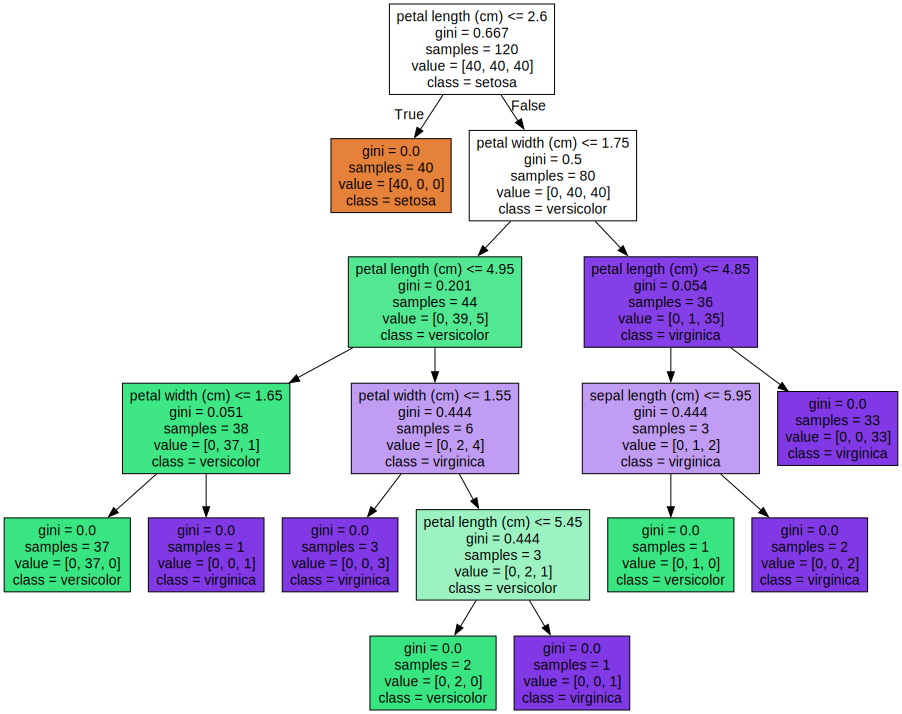

In [5]:
# dot파일 읽기
import graphviz
with open('data/tree.dot',encoding='utf 8') as f:
    dot_graph =f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

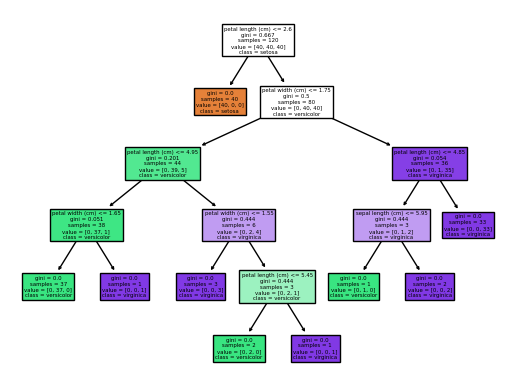

In [7]:
plot_tree(dtc,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show

##### 결하기 위해 사용하는 질문(노드)의 개수
- 제약 조건 :max_depth =3

In [10]:
dtc2 =DecisionTreeClassifier(max_depth=3,random_state=156)
dtc2.fit(X_train,y_train)
export_graphviz(dtc2,'data/tree2.dot',feature_names=iris.feature_names,
                class_names=iris.target_names,filled=True)

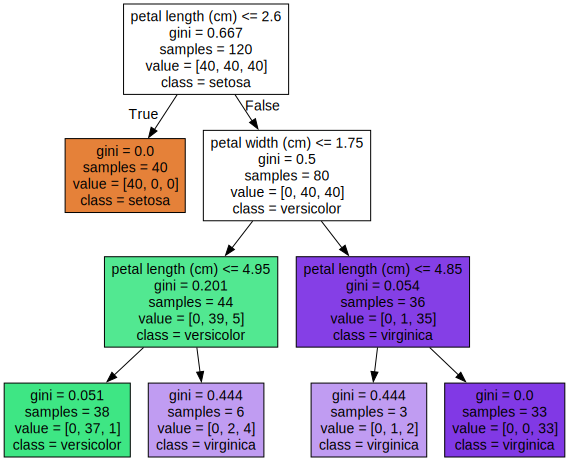

In [11]:
with open('data/tree2.dot') as  f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

####  내부 노드를 분할하기 위한 최소한의 샘플 수를 지정하는 하이퍼파라미터
- 제약 조건 :min_samples_split=4

In [12]:
dtc3 =DecisionTreeClassifier(min_samples_split=4,random_state=156)
dtc3.fit(X_train,y_train)
export_graphviz(dtc3,'data/tree3.dot',feature_names=iris.feature_names,
                class_names=iris.target_names,filled=True)

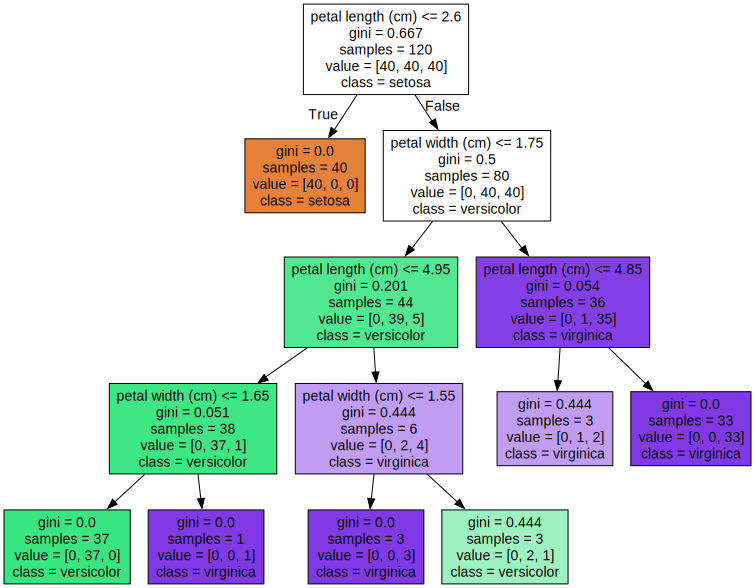

In [13]:
with open('data/tree3.dot') as  f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- 모델 비교

In [14]:
dtc.score(X_test,y_test)
dtc2.score(X_test,y_test)
dtc3.score(X_test,y_test)

1.0

- 모델이 제공하는 정보 :Feature importance

In [15]:
#함수뒤에 _언더바 나오면 학습한후에 나한테 제공하는 정보
#데이터셋에서 가장 중요한 특성을 먼저 선택하여 분할(split)하고, 이를 반복
#feature_importances_ 값은 0과 1 사이의 실수값으로 나타납니다
#값이 1에 가까울수록 해당 feature가 분류를 하는 데 매우 중요
dtc.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

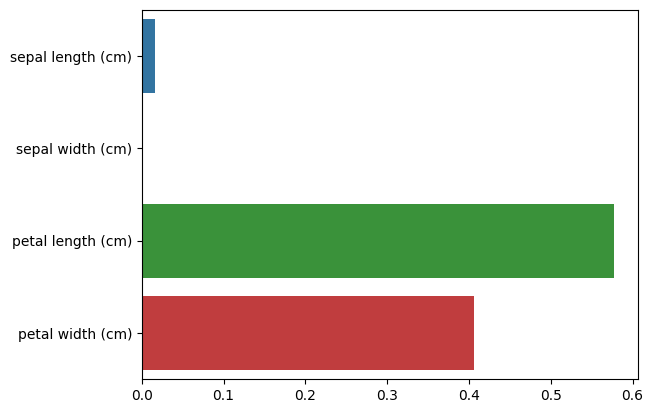

In [18]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_,y=iris.feature_names)
plt.show()

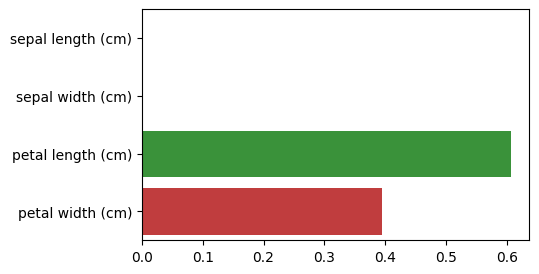

In [21]:
plt.figure(figsize=(5,3))
sns.barplot(x=dtc2.feature_importances_,y=iris.feature_names)
plt.show()